In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
df = pd.read_csv('C:\Users\nguye\Documents\traffic-situation-prediction\data\TrafficTwoMonth.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10,Tuesday,11,2,1,34,48,normal


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               5952 non-null   object
 1   Date               5952 non-null   int64 
 2   Day of the week    5952 non-null   object
 3   CarCount           5952 non-null   int64 
 4   BikeCount          5952 non-null   int64 
 5   BusCount           5952 non-null   int64 
 6   TruckCount         5952 non-null   int64 
 7   Total              5952 non-null   int64 
 8   Traffic Situation  5952 non-null   object
dtypes: int64(6), object(3)
memory usage: 418.6+ KB


In [4]:
# Lọc các cột cần thiết
df_selected = df[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']]

# Kiểm tra dữ liệu
print(df_selected.head())

   CarCount  BikeCount  BusCount  TruckCount  Total Traffic Situation
0        13          2         2          24     41            normal
1        14          1         1          36     52            normal
2        10          2         2          32     46            normal
3        10          2         2          36     50            normal
4        11          2         1          34     48            normal


In [5]:
# Mã hóa cột 'Traffic Situation'
traffic_mapping = {
    'low': 0,
    'normal': 1,
    'high': 2,
    'heavy': 3
}
#áp dụng ánh xạ .map()
df_selected['Traffic Situation'] = df_selected['Traffic Situation'].map(traffic_mapping)

# Kiểm tra dữ liệu đã mã hóa
print(df_selected.head())

   CarCount  BikeCount  BusCount  TruckCount  Total  Traffic Situation
0        13          2         2          24     41                  1
1        14          1         1          36     52                  1
2        10          2         2          32     46                  1
3        10          2         2          36     50                  1
4        11          2         1          34     48                  1


C:\Users\phuoc\AppData\Local\Temp\ipykernel_30804\2346783190.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['Traffic Situation'] = df_selected['Traffic Situation'].map(traffic_mapping)


In [6]:
# Đặc trưng và nhãn
X = df_selected[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']]
y = df_selected['Traffic Situation']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Kiểm tra kích thước dữ liệu
print(f'Tập huấn luyện: {X_train.shape}')
print(f'Tập kiểm tra: {X_test.shape}')

Tập huấn luyện: (4166, 5)
Tập kiểm tra: (1786, 5)


In [7]:
# Khởi tạo mô hình
rf_model = RandomForestClassifier(n_estimators=58, max_depth=3,random_state=42)


# Huấn luyện mô hình
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)
#in kết quả dự đoán và so sánh với nhãn thực tế
print("Dự đoán tình trạng giao thông trên tập kiểm tra:")
print(y_pred[:10]) #in ra 10 kết quả đầu tiên
print("So sánh với tình trạng giao thông thực tế:")
print(y_test.values[:10]) #in ra 10 kết quả nhãn thực tế

Dự đoán tình trạng giao thông trên tập kiểm tra:
[0 1 1 1 1 1 3 0 1 1]
So sánh với tình trạng giao thông thực tế:
[0 1 1 2 1 1 3 0 1 1]


In [8]:
# Độ chính xác trên tập kiểm tra
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Độ chính xác trên tập kiểm tra: {accuracy_test:.2%}')

# Dự đoán trên tập huấn luyện
y_train_pred = rf_model.predict(X_train)

# Độ chính xác trên tập huấn luyện
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Độ chính xác trên tập huấn luyện: {accuracy_train:.2%}')

# Báo cáo phân loại
print("Báo cáo phân loại:")
print(classification_report(y_test, y_pred))

# Ma trận nhầm lẫn
print("Ma trận nhầm lẫn:")
print(confusion_matrix(y_test, y_pred))

Độ chính xác trên tập kiểm tra: 90.87%
Độ chính xác trên tập huấn luyện: 91.69%
Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       217
           1       0.87      1.00      0.93      1114
           2       0.00      0.00      0.00       122
           3       0.99      1.00      1.00       333

    accuracy                           0.91      1786
   macro avg       0.72      0.70      0.71      1786
weighted avg       0.85      0.91      0.88      1786

Ma trận nhầm lẫn:
[[ 178   39    0    0]
 [   0 1112    0    2]
 [   0  122    0    0]
 [   0    0    0  333]]


c:\Users\phuoc\Desktop\Traffic_Prediction_Dataset\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phuoc\Desktop\Traffic_Prediction_Dataset\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\phuoc\Desktop\Traffic_Prediction_Dataset\venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

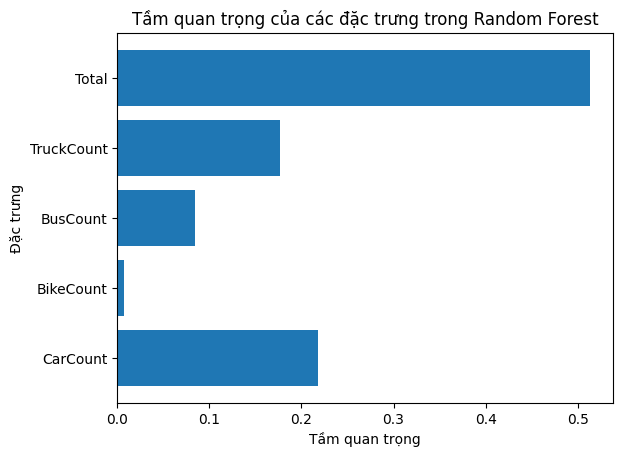

In [9]:
# Hiển thị tầm quan trọng của các đặc trưng


feature_importances = rf_model.feature_importances_
features = X.columns

plt.barh(features, feature_importances)
plt.xlabel('Tầm quan trọng')
plt.ylabel('Đặc trưng')
plt.title('Tầm quan trọng của các đặc trưng trong Random Forest')
plt.show()

In [10]:
# Ví dụ dữ liệu mới
new_data = [[50, 10, 2, 3, 65]]  # CarCount, BikeCount, BusCount, TruckCount, Total

# Dự đoán
predicted_situation = rf_model.predict(new_data)
situation_mapping = {0: 'low', 1: 'normal', 2: 'high', 3: 'heavy'}
print(f'Tình trạng giao thông dự đoán: {situation_mapping[predicted_situation[0]]}')


Tình trạng giao thông dự đoán: low


c:\Users\phuoc\Desktop\Traffic_Prediction_Dataset\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
